In [0]:
# SOM
# from https://www.superdatascience.com/deep-learning/ 


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Install MiniSOM
# https://github.com/JustGlowing/minisom 
!pip install minisom

  Running setup.py bdist_wheel for minisom ... - done
  Stored in directory: /root/.cache/pip/wheels/4a/5c/75/d21b1b07292ccd8720a8076304f793031e016c16e9c8eacbf9
Successfully built minisom


In [6]:
# Getting Data
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "Credit_Card_Applications.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

Credit_Card_Applications.csv


**Utilizar uma largura de duas unidades ( 0 ou 1), para descobrir as aplicações que foram aceitas ou não, através da última variável dada no código.**

In [33]:
# Importing the dataset
dataset = pd.read_csv(DATA_PATH+FILE_TO_DOWNLOAD)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

dataset.head(  )




,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


**Range como 0 ou 1 para o motivo já explicado sobre as variáveis finais do código. No caso se foram aceitas ou não as aplicações.**

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

**Aumentei o mapa para ter uma análise mais aprofundada sobre as partes isoladas e descobrir com mais facilidade quais são as fraudes prováveis fraudes detectadas.**
**Não alterei o número de interações para X, já que o data set é pequeno.**
**Além de dobrar a taxa de aprendizado, talvez tenha influenciado a máquina.**


In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 15, y = 15, input_len = 15, sigma = 1.0, learning_rate = 1.0)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

**Teremos o azul como a classe negativa (Quadrado) e o vermelho como a classe positiva (Círculo).**



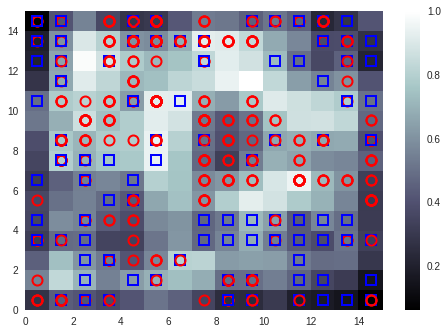

In [36]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'b']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


**As fraudes são indetificadas como as partes isoladas e nos MIT's mais brancos, ao qual fogem das regras gerais. Portanto as fraudes estão nos neurônios mais distantes da grande massa, no caso as extremidades isoladas. Porém só são descobertas com a Distância Euclidiana e dessa forma os dados corretos são digitados manualmente sendo qualquer vizinho que fuja desse padrão, provavelmente, uma fraude.**